In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials
from google.colab import drive
import glob

import cv2
import numpy as np
import keras
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Activation
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
import numpy as np
from matplotlib import pyplot as plt



In [32]:



drive.mount('/content/drive', force_remount = True)


Mounted at /content/drive


In [0]:

img_path = glob.glob("/content/drive/My Drive/modified/modified/*")
print(np.array(img_path).shape)
y_train = []
x_train = []
y_test = []
x_test = []
count = 0
for path in img_path:
  image = cv2.imread(path)
  x_train.append(image)
  y_train.append(int(path[-6]))
  count +=1
  print(count)
x_train = np.array(x_train)
y_train = np.array(y_train)
y_train = keras.utils.to_categorical(y_train, num_classes = 6)
print(x_train.shape,y_train.shape)

img_path = glob.glob("/content/drive/My Drive/test/test_modified/*")
print(np.array(img_path).shape)
count = 0
for path in img_path:
  image = cv2.imread(path)
  x_test.append(image)
  y_test.append(int(path[-6]))
  count +=1
  print(count)
x_test = np.array(x_test)
y_test = np.array(y_test)
y_test = keras.utils.to_categorical(y_test, num_classes = 6)
print(x_test.shape,y_test.shape)

(1171, 128, 128)
(1171, 128, 128, 1)
(208, 128, 128)
(208, 128, 128, 1)


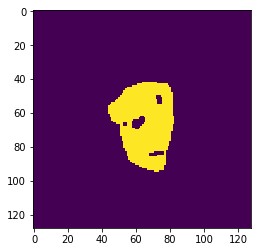

In [43]:


x_train_gr = np.zeros([len(x_train),128,128])
x_test_gr = np.zeros([len(x_test),128,128])
for k in range(len(x_train)):
  temp = x_train[k]
  temp = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY)
  temp[temp == 14] = 0 #corresponding during image storing
  temp[temp == 38] = 1
  x_train_gr[k] = temp

for k in range(len(x_test)):
  temp = x_test[k]
  temp = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY)
  temp[temp == 14] = 0 #corresponding during image storing
  temp[temp == 38] = 1
  x_test_gr[k] = temp

plt.imshow(x_train_gr[2])
print(x_train_gr.shape)
x_train_gr = np.expand_dims(x_train_gr, axis=3)
print(np.array(x_train_gr).shape)

plt.imshow(x_test_gr[2])
print(x_test_gr.shape)
x_test_gr = np.expand_dims(x_test_gr, axis=3)
print(np.array(x_test_gr).shape)


In [35]:


weight_decay = 1e-4

num_classes = 6

model = Sequential()

model.add(Conv2D(64, (4,4), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=(128,128,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (4,4), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(128, (4,4), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (4,4), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (4,4), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (4,4), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(128, activation="sigmoid"))
model.add(Activation('relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(0.0003), metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 128, 128, 64)      1088      
_________________________________________________________________
activation_29 (Activation)   (None, 128, 128, 64)      0         
_________________________________________________________________
batch_normalization_25 (Batc (None, 128, 128, 64)      256       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 128, 128, 64)      65600     
_________________________________________________________________
activation_30 (Activation)   (None, 128, 128, 64)      0         
_________________________________________________________________
batch_normalization_26 (Batc (None, 128, 128, 64)      256       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 64, 64, 64)       

In [44]:
model.fit(x = x_train_gr,y = y_train, batch_size=64, validation_data = (x_test_gr,y_test), epochs = 5)

Train on 1171 samples, validate on 208 samples
Epoch 1/5
1171/1171 [==============================] - 765s 653ms/step - loss: 0.2516 - acc: 0.9624 - val_loss: 0.1371 - val_acc: 0.9952
Epoch 2/5
1171/1171 [==============================] - 763s 651ms/step - loss: 0.2136 - acc: 0.9684 - val_loss: 0.1190 - val_acc: 0.9952
Epoch 3/5
1171/1171 [==============================] - 764s 653ms/step - loss: 0.1969 - acc: 0.9761 - val_loss: 0.1104 - val_acc: 1.0000
Epoch 4/5
1171/1171 [==============================] - 759s 648ms/step - loss: 0.1867 - acc: 0.9761 - val_loss: 0.1022 - val_acc: 1.0000
Epoch 5/5
1171/1171 [==============================] - 756s 646ms/step - loss: 0.1810 - acc: 0.9769 - val_loss: 0.0997 - val_acc: 1.0000


In [0]:

model.save_weights('casual_training2.h5')


In [0]:
!pip install -U -q PyDrive

In [0]:


auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
model.save('model2.h5')
model_file = drive.CreateFile({'colab_models':'model2.h5'})
model_file.SetContentFile('model2.h5')
model_file.Upload()

In [49]:
drive.CreateFile({'id': model_file.get('id')})

GoogleDriveFile({'id': '1DHaeaOpwFcUw3S71RWhGSLzFqRJSmlNf'})

In [0]:
file_obj = drive.CreateFile({'id': '1ZCJ4_AnKkdBGBeZRkpkTRZUjlqO5HMRP'})
file_obj.GetContentFile('model1.h5')